<a href="https://colab.research.google.com/github/JinnnnyHong/machine-learning_math-/blob/main/Fake_Bills.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd

In [42]:
url = 'https://raw.githubusercontent.com/JinnnnyHong/machine-learning_math-/main/fake_bills.csv'
df = pd.read_csv(url, sep = ';')
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [43]:
df.info() #df정보확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [44]:
df.isna().sum() #결측치 개수 확인

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

## 정답 one-hot encoding

In [45]:
#one-hot encoding

df1 = pd.get_dummies(df, columns = ['is_genuine'])

In [46]:
df1

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine_False,is_genuine_True
0,171.81,104.86,104.95,4.52,2.89,112.83,0,1
1,171.46,103.36,103.66,3.77,2.99,113.09,0,1
2,172.69,104.48,103.50,4.40,2.94,113.16,0,1
3,171.36,103.91,103.94,3.62,3.01,113.51,0,1
4,171.73,104.28,103.46,4.04,3.48,112.54,0,1
...,...,...,...,...,...,...,...,...
1495,171.75,104.38,104.17,4.42,3.09,111.28,1,0
1496,172.19,104.63,104.44,5.27,3.37,110.97,1,0
1497,171.80,104.01,104.12,5.51,3.36,111.95,1,0
1498,172.06,104.28,104.06,5.17,3.46,112.25,1,0


<Axes: >

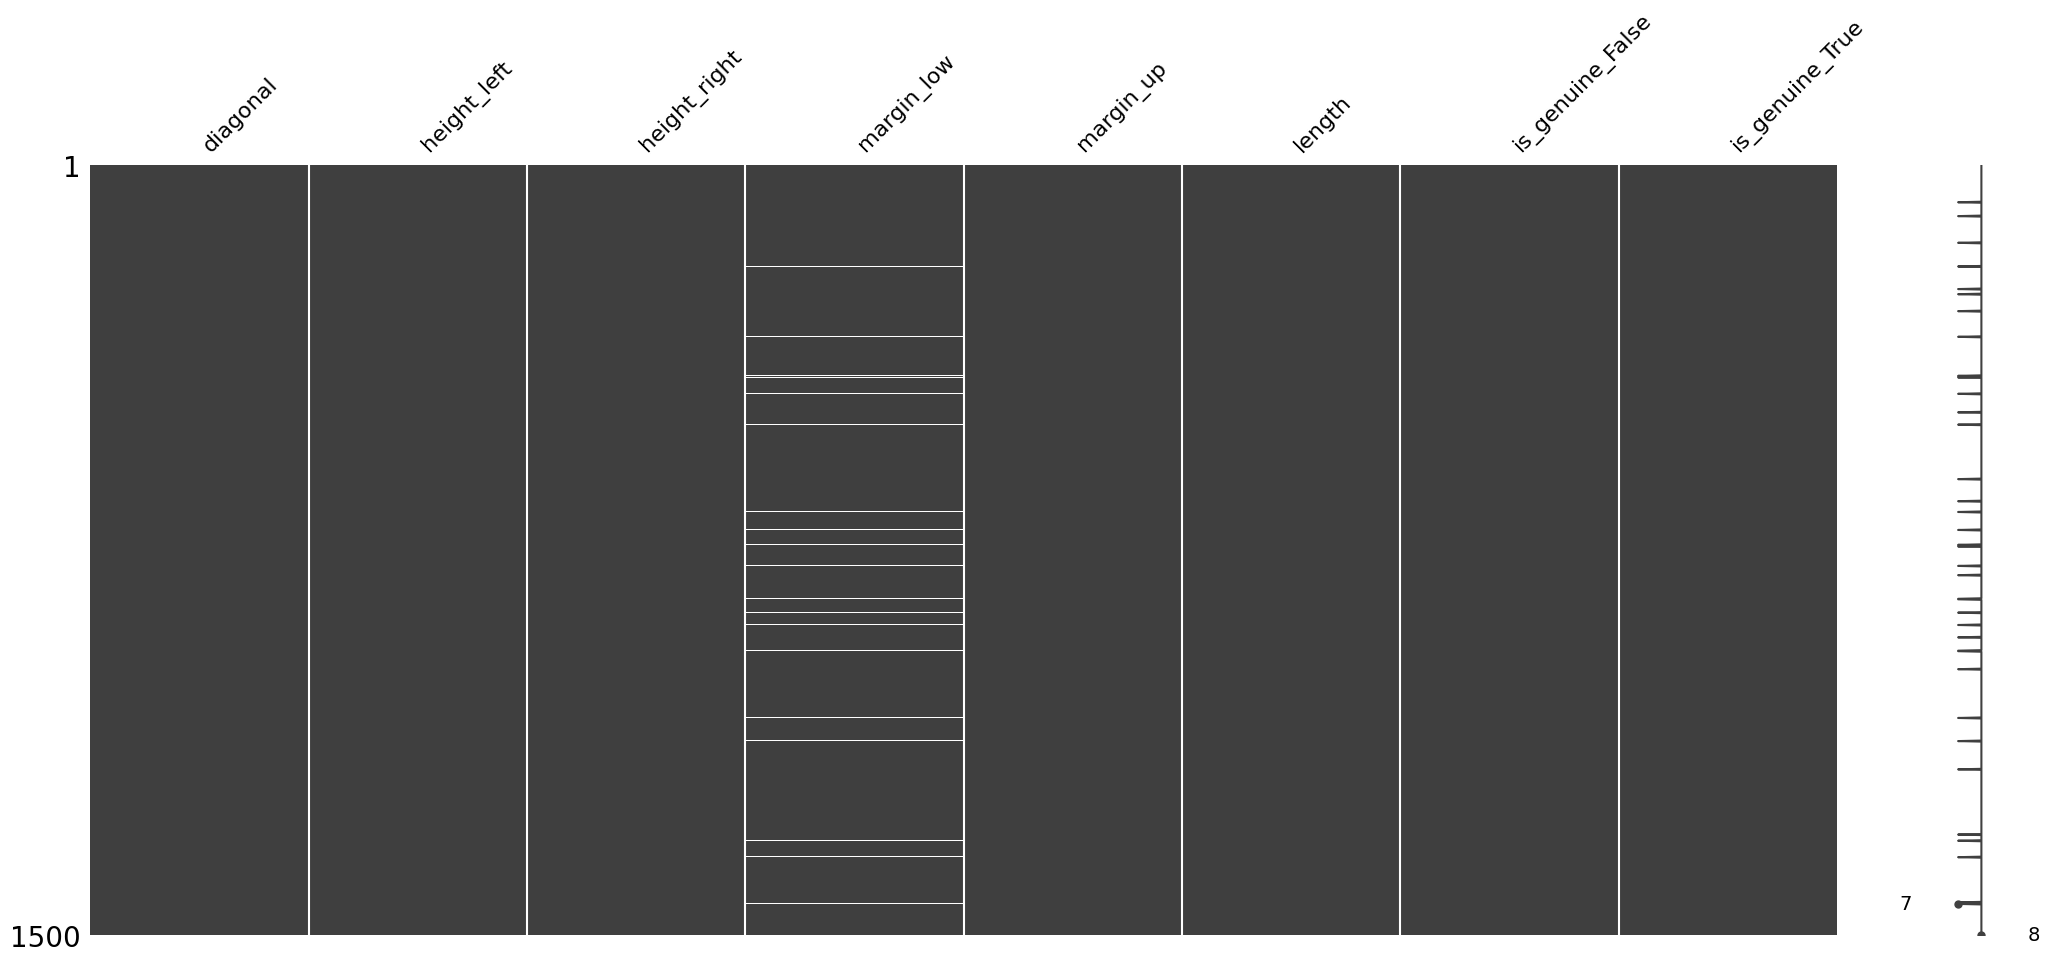

In [47]:
import missingno as msno #결측치 확인하기

msno.matrix(df1)

<Axes: >

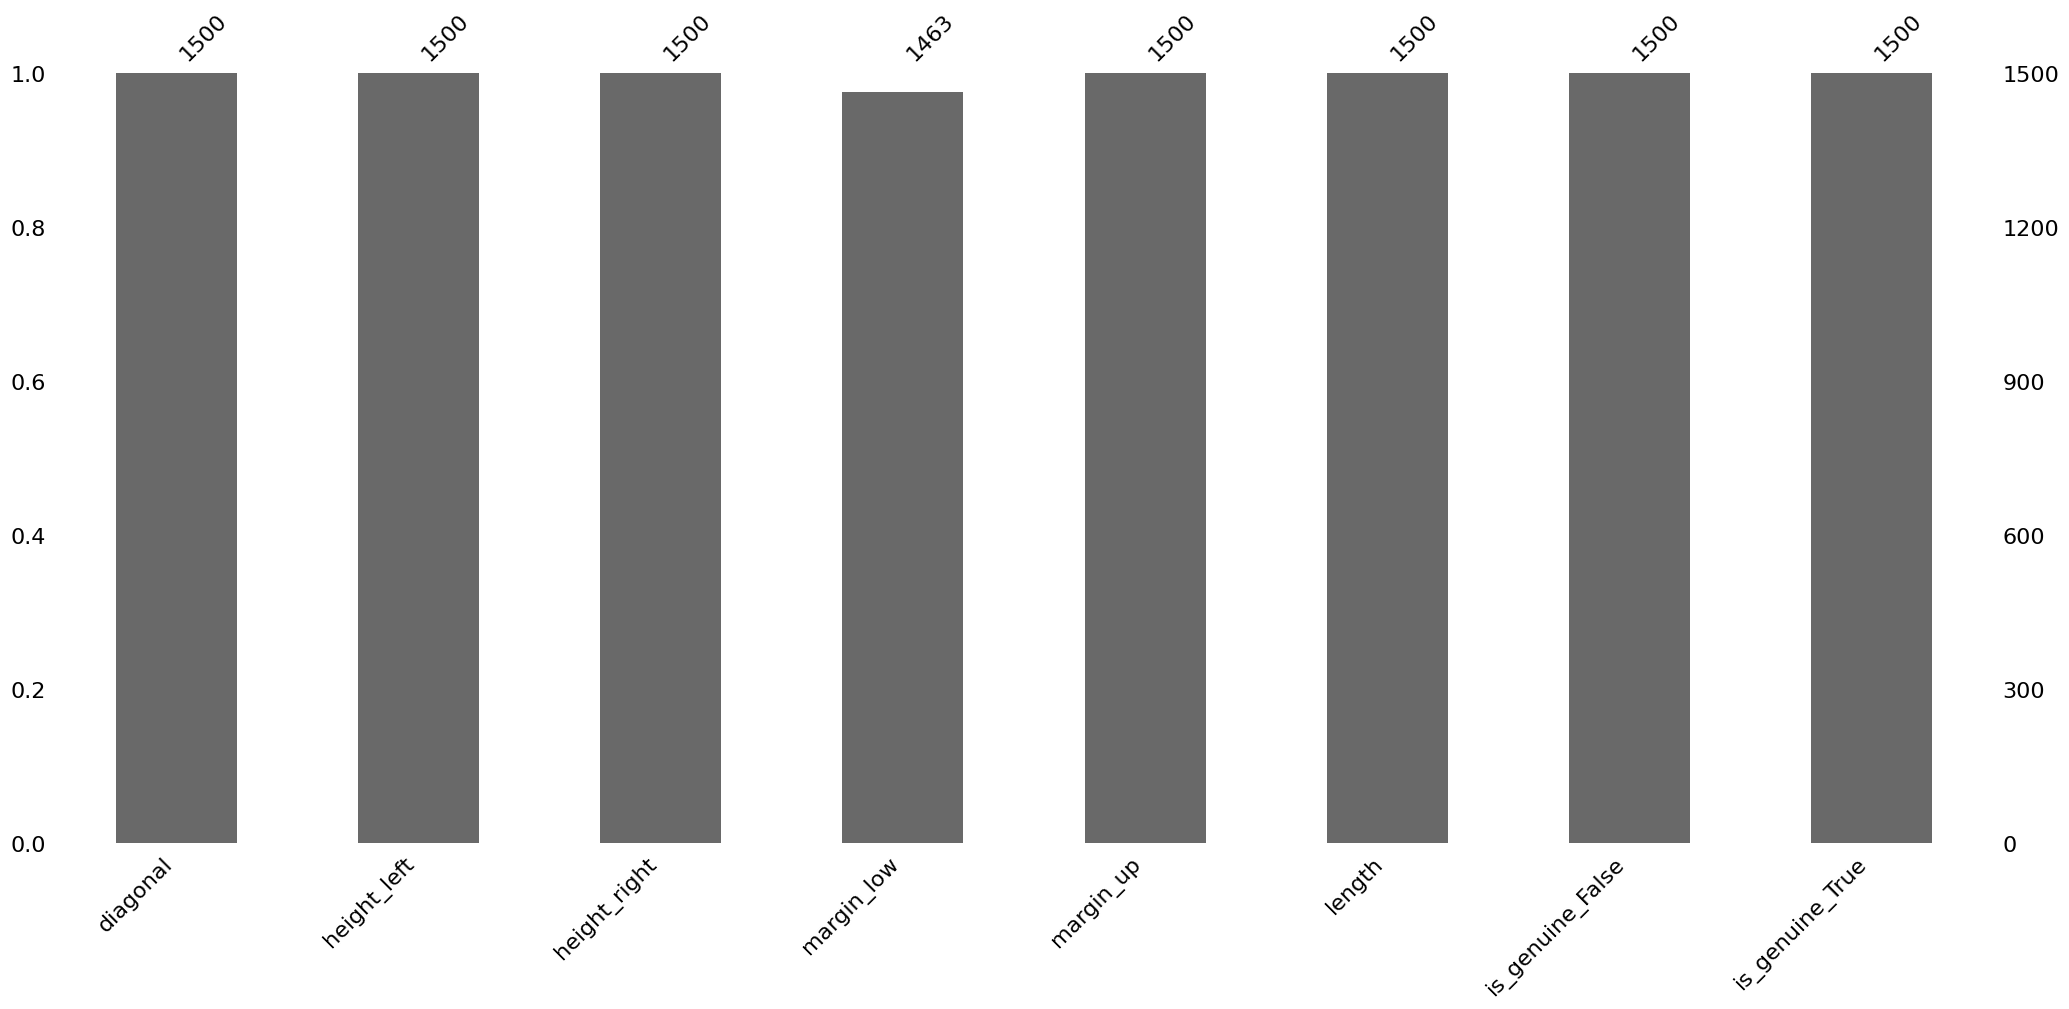

In [48]:
msno.bar(df1)

In [49]:
#상관관계 확인
corr_matrix = np.corrcoef(df1.T)
print(corr_matrix)

[[ 1.          0.01947232 -0.02449201         nan -0.05564888  0.09758729
  -0.13275633  0.13275633]
 [ 0.01947232  1.          0.24227881         nan  0.24652224 -0.32086276
   0.37983292 -0.37983292]
 [-0.02449201  0.24227881  1.                 nan  0.30700464 -0.40175122
   0.48509183 -0.48509183]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]
 [-0.05564888  0.24652224  0.30700464         nan  1.         -0.52057513
   0.60626226 -0.60626226]
 [ 0.09758729 -0.32086276 -0.40175122         nan -0.52057513  1.
  -0.84928463  0.84928463]
 [-0.13275633  0.37983292  0.48509183         nan  0.60626226 -0.84928463
   1.         -1.        ]
 [ 0.13275633 -0.37983292 -0.48509183         nan -0.60626226  0.84928463
  -1.          1.        ]]


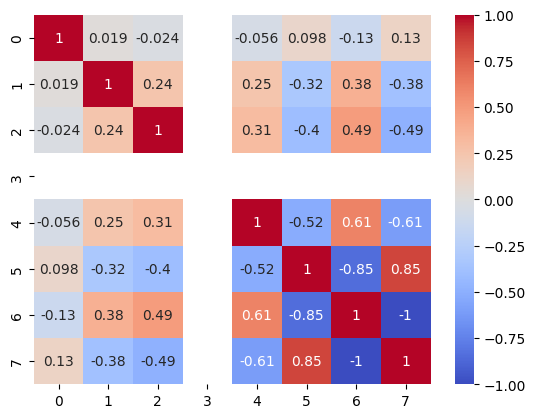

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.show()

## KNN imputer를 통해 KNN으로 결측치 채움 

In [51]:
from sklearn.impute import KNNImputer

col_impute = ["margin_low"]
imputer = KNNImputer(n_neighbors=5)
df1[col_impute] = imputer.fit_transform(df1[col_impute])

## pairplot을 통한 자료 확인

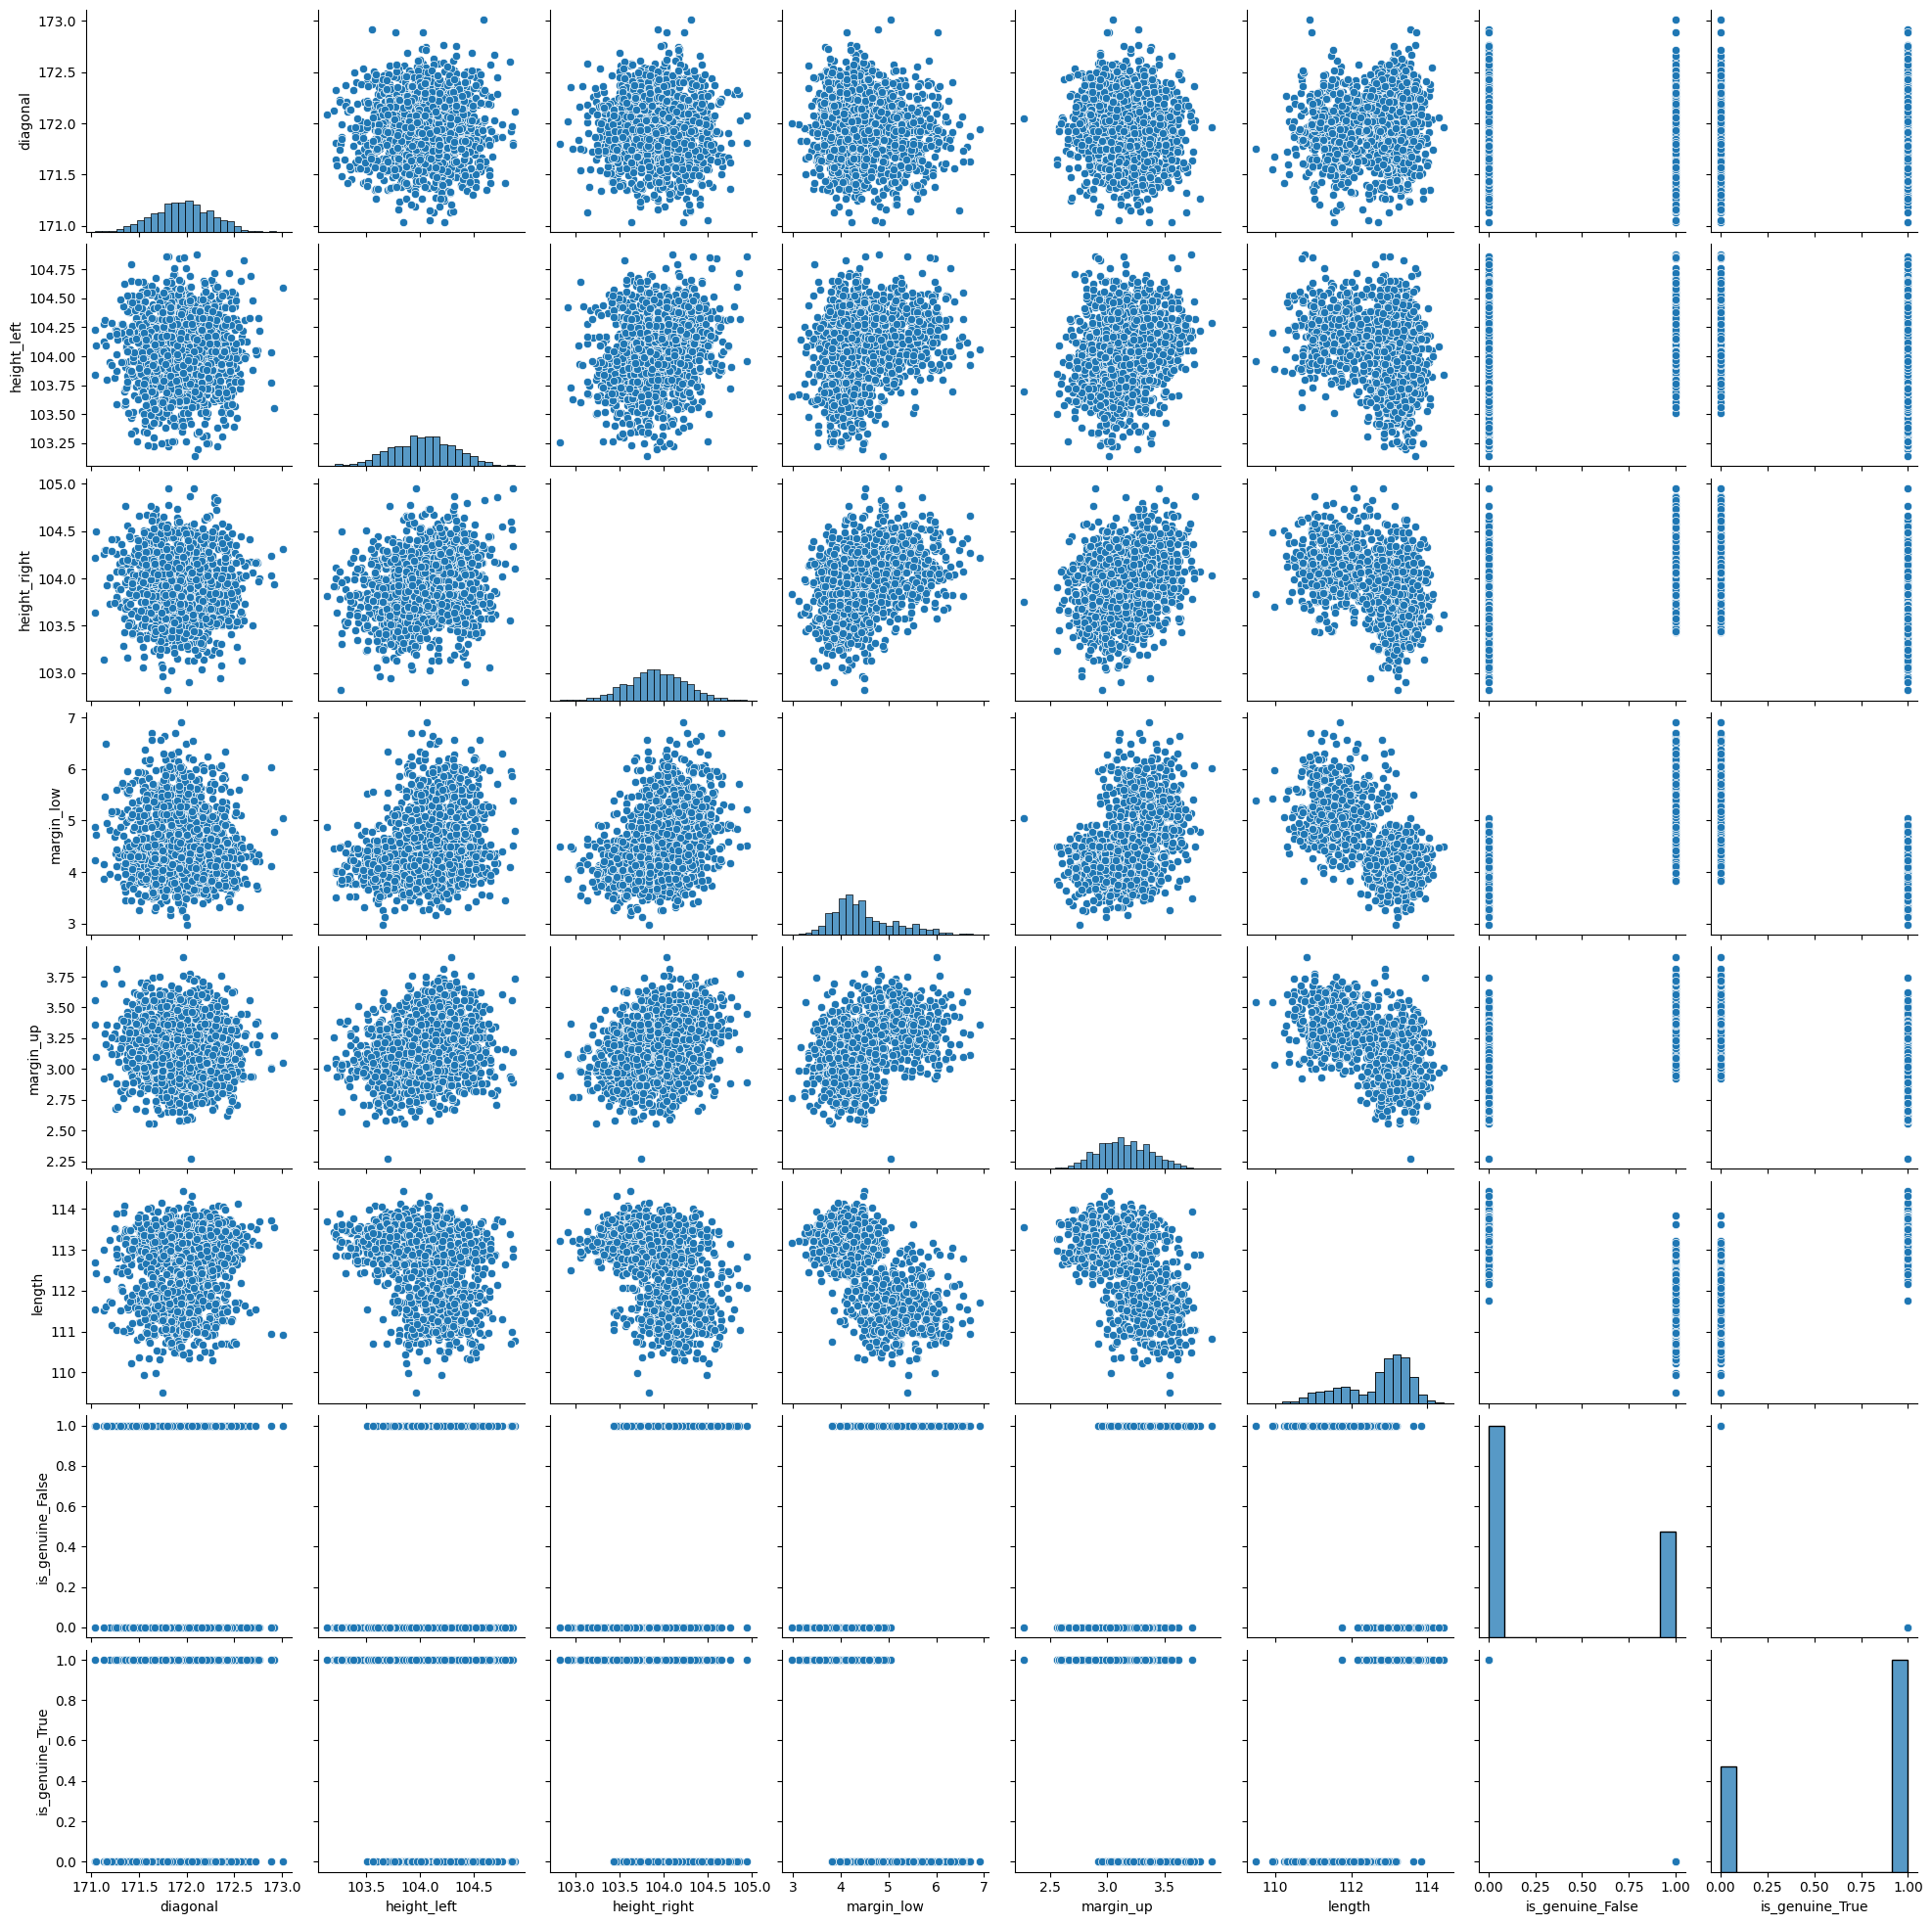

In [52]:
import seaborn as sns
sns.pairplot(df1)

## standardization으로 normalizing

In [53]:
from sklearn.preprocessing import StandardScaler
y = df1['is_genuine_False']
X = df1.drop(['is_genuine_False', 'is_genuine_True'], axis=1)

scaler = StandardScaler()

X_trans = scaler.fit_transform(X)

## train dataset과 test dataset을 구분,stratify 옵션도 사용

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=42, stratify=y)

## KNN Grid Search

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
param_grid = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}


grid_search = GridSearchCV(knn, param_grid, cv=10)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


## test dataset 성능 평가

In [56]:
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3, weights="uniform", metric="manhattan")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)


Accuracy on test set: 0.9833333333333333
